Getting started using this brown dwarf metric notebook as a guide: https://github.com/yoachim/LSST-BD-Cadence/blob/main/bd_dist_metric.ipynb

In [151]:
from lsst.sims.maf.metrics.baseMetric import BaseMetric
import lsst.sims.maf.utils as mafUtils
import lsst.sims.utils as utils
from scipy import interpolate

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import astropy.units as u
from astropy.io import ascii

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.maps as maps

In [4]:
from mafContrib.lssmetrics import depthLimitedNumGalMetric

/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:95: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName==self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/db/opsimDatabase.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if groupBy is 'default' and tableName!=self.defaultTable:
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  (key is not 'bins') & (key is not 'binCol'):
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:127: SyntaxWarning: "is not" with a literal. Did yo

In [8]:
dbFile = '/sims_maf/fbs_1.7/baseline/baseline_nexp2_v1.7_10yrs.db'
runName = dbFile.replace('.db', '')
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [219]:
#nside=4096 # ~approximate resolution 0.858872 arcminutes
nside = 16 # 64
bundleList = []
#sql=''
sql = 'filter="g" or filter="i"'
#sqlconstraint = 'filter = "r" and night < 365'
sql_i = 'filter = "i"'
sql_g = 'filter = "g"'
#sql = 'night < 2000 and (filter="g" or filter="i")'
slicer = slicers.HealpixSlicer(nside=nside)
#slicer = slicers.UserPointsSlicer(11.8929, -25.2922)
#plotDict = {}
plotDict = {}

# Now the mags for another type
metric_ngal = depthLimitedNumGalMetric.DepthLimitedNumGalMetric(nfilters_needed=2, nside=nside, lim_ebv=0.2, metricName='numGal')
bundleList.append(metricBundles.MetricBundle(metric_ngal,slicer,sql, plotDict=plotDict,
                                             runName=runName))

mafMap = maps.StellarDensityMap()
metric_nstar = metrics.StarDensityMetric(rmagLimit=27.5,metricName='nstars_rmag<28')
bundleList.append(metricBundles.MetricBundle(metric_nstar,slicer, sql, mapsList=[mafMap], plotDict=plotDict, runName=runName))

metric_coadd = metrics.Coaddm5Metric()
bundleList.append(metricBundles.MetricBundle(metric_coadd, slicer, sql_i, plotDict=plotDict))
bundleList.append(metricBundles.MetricBundle(metric_coadd, slicer, sql_g, plotDict=plotDict))

metric_seeing = metrics.PercentileMetric(col='seeingFwhmGeom', percentile=33.3)
bundleList.append(metricBundles.MetricBundle(metric_seeing, slicer, sql_i, plotDict=plotDict))

metric_median_seeing = metrics.MedianMetric(col='seeingFwhmGeom')
bundleList.append(metricBundles.MetricBundle(metric_median_seeing, slicer, sql_i, plotDict=plotDict))

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


Querying database SummaryAllProps with constraint filter = "i" for columns ['fieldRA', 'seeingFwhmGeom', 'fieldDec', 'fiveSigmaDepth']
Found 455743 visits
Running:  ['opsim_CoaddM5_i_HEAL', 'opsim_33th_ile_seeingFwhmGeom_i_HEAL', 'opsim_Median_seeingFwhmGeom_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter="g" or filter="i" for columns ['fieldRA', 'fieldDec', 'filter', 'fiveSigmaDepth']
Found 660754 visits
Running:  ['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_numGal_g_or_i_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt28_g_or_i_HEAL']


/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/slicers/baseSpatialSlicer.py:110: UserWarning: Warning:  Loading maps but cache on.Should probably set useCache=False in slicer.
  warnings.warn('Warning:  Loading maps but cache on.'
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/maps/dustMap.py:24: UserWarning: Slicer value of nside (16) different from map value (128), using slicer value
  warnings.warn('Slicer value of nside (%i) different from map value (%i), using slicer value'


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "g" for columns ['fieldRA', 'fieldDec', 'fiveSigmaDepth']
Found 205011 visits
Running:  ['opsim_CoaddM5_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "i"" constraint now.


/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 25.906  dipole: lon: 117.771, lat: -72.1206, amp: 0.424111
  warnings.warn(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 0.8428  dipole: lon: -54.9463, lat: 65.5583, amp: 0.117023
  warnings.warn(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax 

Plotting complete.
Plotting figures with "filter="g" or filter="i"" constraint now.


/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 3.88675e+06  dipole: lon: 94.1306, lat: -35.815, amp: 19874
  warnings.warn(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.

Plotting complete.
Plotting figures with "filter = "g"" constraint now.


/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: 26.5207  dipole: lon: 112.925, lat: -78.1257, amp: 0.484015
  warnings.warn(


Plotting complete.


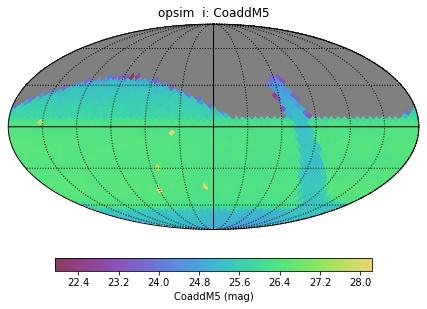

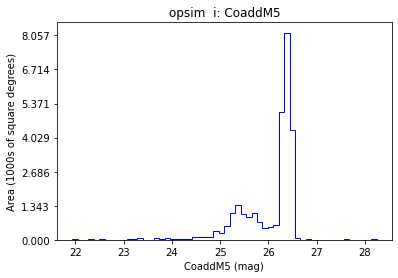

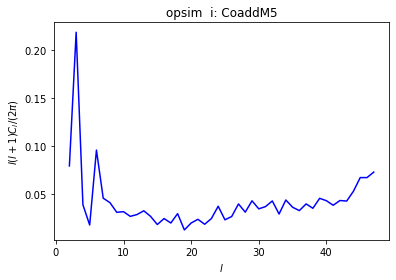

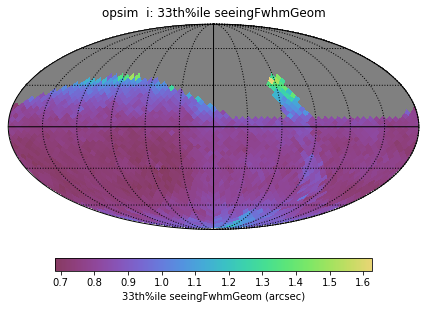

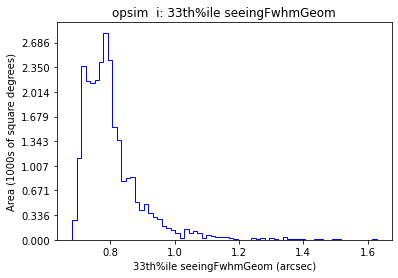

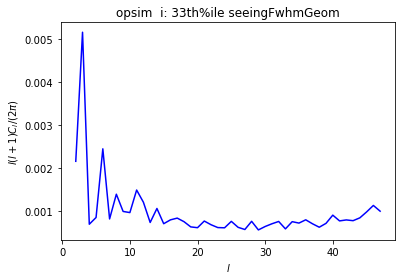

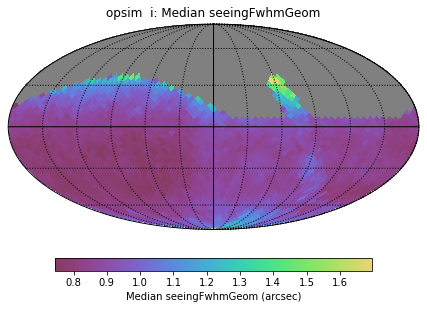

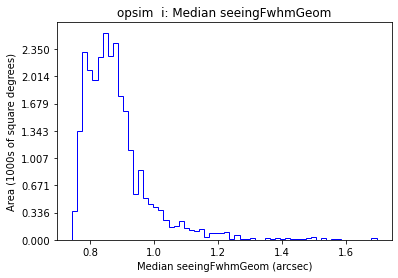

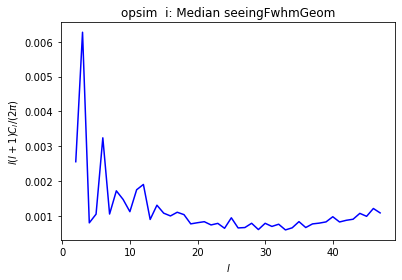

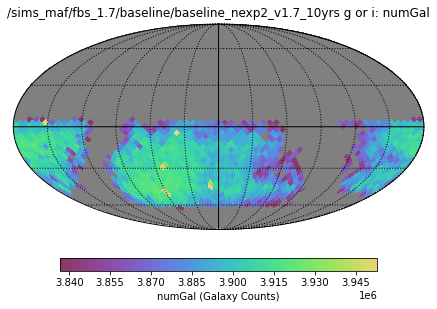

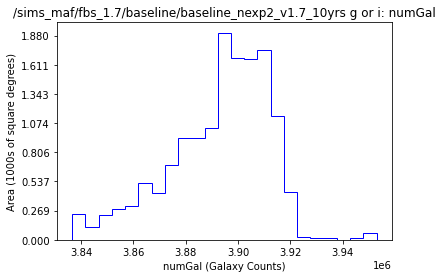

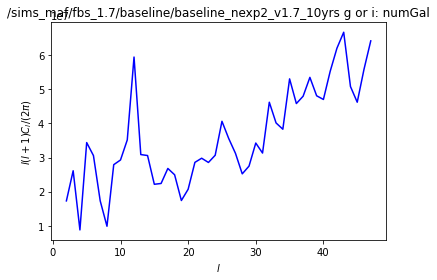

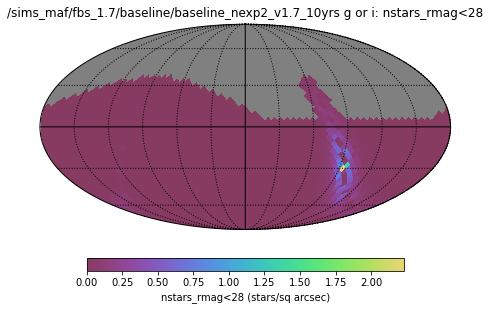

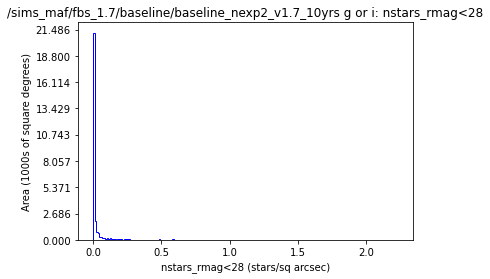

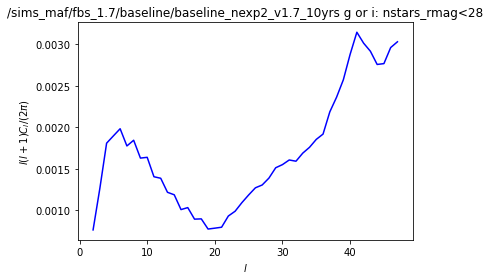

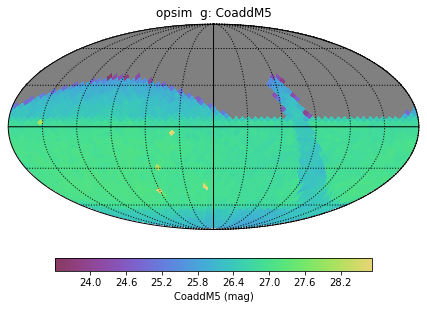

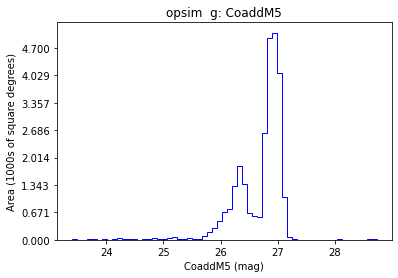

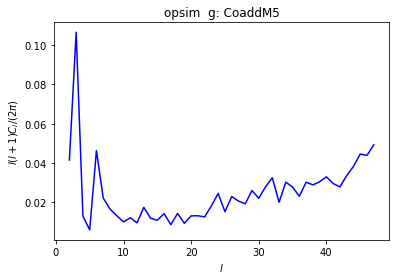

In [220]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [221]:
# S/N = S/sqrt(S+N) ~ S/sqrt(N)

In [222]:
i5 = bg.bundleDict['opsim_CoaddM5_i_HEAL'].metricValues
g5 = bg.bundleDict['opsim_CoaddM5_g_HEAL'].metricValues
iband_seeing33 = bg.bundleDict['opsim_33th_ile_seeingFwhmGeom_i_HEAL'].metricValues
iband_seeing = bg.bundleDict['opsim_Median_seeingFwhmGeom_i_HEAL'].metricValues

ngal = bg.bundleDict['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_numGal_g_or_i_HEAL'].metricValues
nstar = bg.bundleDict['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_nstars_rmaglt28_g_or_i_HEAL'].metricValues

In [223]:
# Calculate the factor to go from number per healpix to number per square arcminute or per square arcsec
pixarea_deg = hp.nside2pixarea(nside, degrees=True)*(u.degree**2)
pixarea_arcmin = pixarea_deg.to(u.arcmin**2)
pixarea_arcsec = pixarea_deg.to(u.arcsec**2)

In [224]:
# Number of galaxies is the total in each healpix. Convert to number per sq. arcmin:
ngal_per_arcmin = ngal/pixarea_arcmin

# Star density is number of stars per square arcsec. Convert to a total number per healpix, then number per sq. arcmin:
nstar_per_healpix = nstar*pixarea_arcsec
nstar_per_arcmin = nstar_per_healpix/pixarea_arcmin

/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/data0/lsst_stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.2/lib/pyth

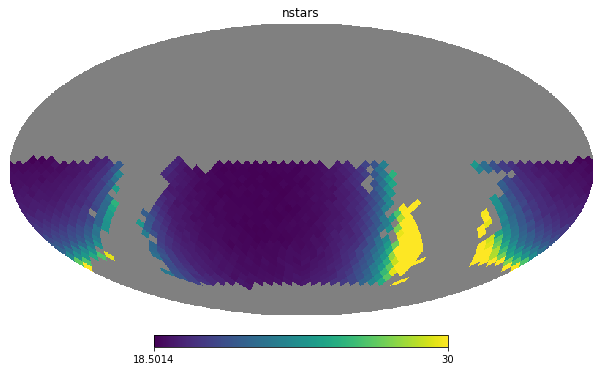

In [225]:
# Account for:
#  - cmd_frac: fraction of CMD area being selected
#  - stargal_contamination: what fraction of objects in your "star" selection after star-galaxy separation are background galaxy contaminants?

cmd_frac = 0.1
stargal_contamination = 0.40
nsigma = 10.0

# Output: number of stars required to reach our requested S/N
#dum = hp.mollview(ngal_per_arcmin, title='ngxs')
#dum = hp.mollview(nstar_per_arcmin, title='nstars')
#dum = hp.mollview(nsigma*np.sqrt(ngal_per_arcmin*(cmd_frac*stargal_contamination)), title='nstars')
dum = hp.mollview(nsigma*np.sqrt(ngal_per_arcmin*(cmd_frac*stargal_contamination)+(nstar_per_arcmin*cmd_frac)), title='nstars', max=30)

In [226]:
np.nanmean(ngal_per_arcmin)

80.52355622862257

In [48]:
mmm = maps.StellarDensityMap()

In [140]:
mmm.keynames

['starLumFunc_r', 'starMapBins_r']

In [138]:
metrics.StarDensityMetric?

Init signature:
metrics.StarDensityMetric(
    rmagLimit=25.0,
    units='stars/sq arcsec',
    filtername='r',
    maps=['StellarDensityMap'],
    **kwargs,
)
Docstring:     
Interpolate the stellar luminosity function to return the number of
stars per square arcsecond brighter than the rmagLimit. Note that the
map is built from CatSim stars in the range 20 < r < 28.
File:           /data0/lsst_stack/stack/miniconda3-py38_4.9.2-0.4.2/Linux64/sims_maf/2.13.0.sims-93-g8bc2eb33+a14e41332a/python/lsst/sims/maf/metrics/starDensity.py
Type:           MetricRegistry
Subclasses:     


### Next apply this to simulated dwarf galaxy stellar populations:

1. Calculate the luminosity function of a simulated dwarf _of a given luminosity_,
2. Place it at the desired distance,
3. Derive the surface brightness of this dwarf at the applied distance.

In [411]:
'''
#first: compute integrated mag in B:
LF = ascii.read('LF_-1.5_10Gyr_B.dat', header_start=12)
mags = LF['magbinc']
counts = LF['Bmag']
intBmag = -2.5*np.log10( np.sum(counts * np.power(10.0,-0.4*mags) ))
print ('intMag='+str(intBmag))
#result is 6.856379, store it for later
'''

# make fake LF for old galaxy of given integrated B, distance modulus mu, in any of filters ugrizY
def makeFakeLF(intB, mu, filtername): 
    if (filtername=='y'): filtername=='Y'
    modelBmag = 6.856379 # integrated B mag of the model LF being read
    LF = ascii.read('LF_-1.5_10Gyr.dat', header_start=12)
    mags = LF['magbinc']
    counts = LF[filtername+'mag']
    # shift model LF to requested distance and dim it
    mags = mags + mu
    modelBmag = modelBmag + mu
    # scale model counts up/down to reach the requested intB
    factor = np.power(10.0,-0.4*(intB-modelBmag))
    counts = factor * counts
    # resample from Poisson:
    return mags, counts
#    countsPoisson = np.random.poisson(counts)
#    return mags, countsPoisson
    
#test: now will make a fake LF for 47Tuc, with intB=5.78, mu0=13.32
#intB=5.78
#mu0=13.32
#LFmags,LFcounts = makeFakeLF(intB,mu0,'r')
#for i in range(len(LFmags)):
#    print (LFmags[i],LFcounts[i])


In [286]:
distance_limit = 4.0e6 # distance limit in parsecs
distmod_limit = 5.0*np.log10(distance_limit) - 5.0

M_B_fake = -8.0
B_fake = distmod_limit+M_B_fake
B_fake2 = distmod_limit+M_B_fake+0.5

In [287]:
iLFmags,iLFcounts = makeFakeLF(B_fake, distmod_limit, 'i')
iLFmags2,iLFcounts2 = makeFakeLF(B_fake2, distmod_limit, 'i')
gLFmags,gLFcounts = makeFakeLF(B_fake, distmod_limit, 'g')

In [412]:
lf_dict_i = {}
lf_dict_g = {}
tmp_MB = -10.0

for i in range(101):
    mbkey = f'MB{tmp_MB:.2f}'
    iLFmags,iLFcounts = makeFakeLF(tmp_MB, 0.0, 'i')
    lf_dict_i[mbkey] = (np.array(iLFmags), np.array(iLFcounts))
    gLFmags,gLFcounts = makeFakeLF(tmp_MB, 0.0, 'g')
    lf_dict_g[mbkey] = (np.array(gLFmags), np.array(gLFcounts))
    tmp_MB += 0.1

In [306]:
iii0, iii1 = lf_dict_i['-9.9']

In [316]:
aa = f'MB{M_B_fake:.2f}' #        f'The value of pi is approximately {math.pi:.3f}.'
print(aa)

MB-8.00


<ipython-input-230-48d001991796>:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(iLFmags, np.log10(iLFcounts))


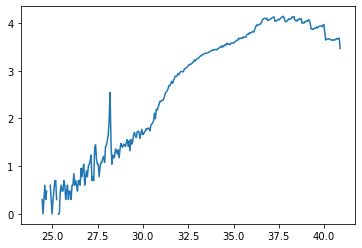

In [230]:
plt.plot(iLFmags, np.log10(iLFcounts))

In [168]:
glim = 26.3
ilim = 26.0
gsel = (gLFmags <= glim)
isel = (iLFmags <= ilim)
nstars_g = np.sum(gLFcounts[gsel])
nstars_i = np.sum(iLFcounts[isel])


In [169]:
print(nstars_g, nstars_i)

7 72


In [323]:
lf_dict_i.keys()

dict_keys(['MB-10.00', 'MB-9.90', 'MB-9.80', 'MB-9.70', 'MB-9.60', 'MB-9.50', 'MB-9.40', 'MB-9.30', 'MB-9.20', 'MB-9.10', 'MB-9.00', 'MB-8.90', 'MB-8.80', 'MB-8.70', 'MB-8.60', 'MB-8.50', 'MB-8.40', 'MB-8.30', 'MB-8.20', 'MB-8.10', 'MB-8.00', 'MB-7.90', 'MB-7.80', 'MB-7.70', 'MB-7.60', 'MB-7.50', 'MB-7.40', 'MB-7.30', 'MB-7.20', 'MB-7.10', 'MB-7.00', 'MB-6.90', 'MB-6.80', 'MB-6.70', 'MB-6.60', 'MB-6.50', 'MB-6.40', 'MB-6.30', 'MB-6.20', 'MB-6.10', 'MB-6.00', 'MB-5.90', 'MB-5.80', 'MB-5.70', 'MB-5.60', 'MB-5.50', 'MB-5.40', 'MB-5.30', 'MB-5.20', 'MB-5.10', 'MB-5.00', 'MB-4.90', 'MB-4.80', 'MB-4.70', 'MB-4.60', 'MB-4.50', 'MB-4.40', 'MB-4.30', 'MB-4.20', 'MB-4.10', 'MB-4.00', 'MB-3.90', 'MB-3.80', 'MB-3.70', 'MB-3.60', 'MB-3.50', 'MB-3.40', 'MB-3.30', 'MB-3.20', 'MB-3.10', 'MB-3.00'])

In [406]:
def sum_luminosity(LFmags, LFcounts):
    magref = LFmags[0]
    totlum = 0.0
    
    for mag, count in zip(LFmags, LFcounts):
        tmpmags = np.repeat(mag, count)
        totlum += np.sum(10.0**((magref - tmpmags)/2.5))

    mtot = magref-2.5*np.log10(totlum)
    return mtot
    
def sblimit(mags_g, mags_i, nstars_req, distlim=4.0):
    distance_limit = distlim*1e6 # distance limit in parsecs
    distmod_limit = 5.0*np.log10(distance_limit) - 5.0

    mg_lim = []
    mi_lim = []
    sbg_lim = []
    sbi_lim = []
    
    for glim, ilim, nstars in zip(mags_g, mags_i, nstars_req):
    # for i in range(len(mags_g)):
        if (glim > 15) and (ilim > 15):
            # print(glim, ilim, nstars)
            fake_MB = -10.0
            ng = 1e6
            ni = 1e6
    
            while (ng > nstars) and (ni > nstars):
                B_fake = distmod_limit+fake_MB
                iLFmags,iLFcounts = makeFakeLF(B_fake, distmod_limit, 'i')
                gLFmags,gLFcounts = makeFakeLF(B_fake, distmod_limit, 'g')
                gsel = (gLFmags <= glim)
                isel = (iLFmags <= ilim)
                ng = np.sum(gLFcounts[gsel])
                ni = np.sum(iLFcounts[isel])
                # print('fake_MB: ',fake_MB, ' ng: ',ng, ' ni: ', ni, ' nstars: ', nstars)
                fake_MB += 0.4
            
            if fake_MB > -9.6:
                gmag_tot = sum_luminosity(gLFmags[gsel], gLFcounts[gsel]) - distmod_limit
                imag_tot = sum_luminosity(iLFmags[isel], iLFcounts[isel]) - distmod_limit
                # S = m + 2.5logA, where in this case things are in sq. arcmin, so A = 1 arcmin^2 = 3600 arcsec^2
                sbtot_g = distmod_limit + gmag_tot + 2.5*np.log10(3600.0)
                sbtot_i = distmod_limit + imag_tot + 2.5*np.log10(3600.0)
                mg_lim.append(gmag_tot)
                mi_lim.append(imag_tot)
                sbg_lim.append(sbtot_g)
                sbi_lim.append(sbtot_i)
            else:
                mg_lim.append(999.9)
                mi_lim.append(999.9)
                sbg_lim.append(999.9)
                sbi_lim.append(999.9)
        else:
            mg_lim.append(999.9)
            mi_lim.append(999.9)
            sbg_lim.append(-999.9)
            sbi_lim.append(-999.9)
        
    return mg_lim, mi_lim, sbg_lim, sbi_lim


In [422]:
def sum_luminosity_quick(LFmags, LFcounts):
    magref = LFmags[0]
    totlum = 0.0
    
    for mag, count in zip(LFmags, LFcounts):
        tmpmags = np.repeat(mag, count)
        totlum += np.sum(10.0**((magref - tmpmags)/2.5))

    mtot = magref-2.5*np.log10(totlum)
    return mtot
    
def sblimit_quick(mags_g, mags_i, nstars_req, distlim=4.0):
    distance_limit = distlim*1e6 # distance limit in parsecs
    distmod_limit = 5.0*np.log10(distance_limit) - 5.0

    mg_lim = []
    mi_lim = []
    sbg_lim = []
    sbi_lim = []
    
    for glim, ilim, nstars in zip(mags_g, mags_i, nstars_req):
    # for i in range(len(mags_g)):
        if (glim > 15) and (ilim > 15):
            # print(glim, ilim, nstars)
            fake_MB = -10.0
            ng = 1e6
            ni = 1e6
    
            while (ng > nstars) and (ni > nstars) and fake_MB<-2.0:
                # B_fake = distmod_limit+fake_MB
                mbkey = f'MB{fake_MB:.2f}'
                iLFmags0,iLFcounts0 = lf_dict_i[mbkey]
                gLFmags0,gLFcounts0 = lf_dict_g[mbkey]
                iLFcounts = np.random.poisson(iLFcounts0)
                gLFcounts = np.random.poisson(gLFcounts0)
                iLFmags = iLFmags0+distmod_limit # Add the distance modulus to make it apparent mags
                gLFmags = gLFmags0+distmod_limit # Add the distance modulus to make it apparent mags
                # print(iLFcounts0-iLFcounts)
                gsel = (gLFmags <= glim)
                isel = (iLFmags <= ilim)
                ng = np.sum(gLFcounts[gsel])
                ni = np.sum(iLFcounts[isel])
                # print('fake_MB: ',fake_MB, ' ng: ',ng, ' ni: ', ni, ' nstars: ', nstars)
                fake_MB += 0.4
            
            if fake_MB > -9.6:
                gmag_tot = sum_luminosity_quick(gLFmags[gsel], gLFcounts[gsel]) - distmod_limit
                imag_tot = sum_luminosity_quick(iLFmags[isel], iLFcounts[isel]) - distmod_limit
                # S = m + 2.5logA, where in this case things are in sq. arcmin, so A = 1 arcmin^2 = 3600 arcsec^2
                sbtot_g = distmod_limit + gmag_tot + 2.5*np.log10(3600.0)
                sbtot_i = distmod_limit + imag_tot + 2.5*np.log10(3600.0)
                mg_lim.append(gmag_tot)
                mi_lim.append(imag_tot)
                sbg_lim.append(sbtot_g)
                sbi_lim.append(sbtot_i)
            else:
                mg_lim.append(999.9)
                mi_lim.append(999.9)
                sbg_lim.append(999.9)
                sbi_lim.append(999.9)
        else:
            mg_lim.append(999.9)
            mi_lim.append(999.9)
            sbg_lim.append(-999.9)
            sbi_lim.append(-999.9)
        
    return mg_lim, mi_lim, sbg_lim, sbi_lim

In [423]:
# Account for:
#  - cmd_frac: fraction of CMD area being selected
#  - stargal_contamination: what fraction of objects in your "star" selection after star-galaxy separation are background galaxy contaminants?

cmd_frac = 0.1
stargal_contamination = 0.40
nsigma = 10.0

nstars_required = nsigma*np.sqrt(ngal_per_arcmin*(cmd_frac*stargal_contamination)+(nstar_per_arcmin*cmd_frac))

In [432]:
%%time
g1, i1, sg1, si1 = sblimit_quick(np.ma.getdata(g5), np.ma.getdata(i5), np.ma.getdata(nstars_required), distlim=4.0)
#g1, i1, sg1, si1 = sblimit(np.ma.getdata(g5[1000:1205]), np.ma.getdata(i5[1000:1205]), np.ma.getdata(nstars_required[1000:1205]), distlim=4.0)
#g2, i2, sg2, si2 = sblimit_quick(np.ma.getdata(g5[1000:1205]), np.ma.getdata(i5[1000:1205]), np.ma.getdata(nstars_required[1000:1205]), distlim=4.0)
#g2, i2, sg2, si2 = sblimit_quick(np.ma.getdata(g5[1000:1002]), np.ma.getdata(i5[1000:1002]), np.ma.getdata(nstars_required[1000:1002]), distlim=4.0)

CPU times: user 5.68 s, sys: 3.85 ms, total: 5.68 s
Wall time: 5.68 s


In [433]:
##plt.hist(sg1, bins=np.arange(28, 36, 0.1), histtype='step')
#plt.hist(g1, bins=np.arange(-10, -3, 0.1), histtype='step', label='orig')
#plt.hist(g2, bins=np.arange(-10, -3, 0.1), histtype='step', label='quick')
#plt.legend()
#plt.show()


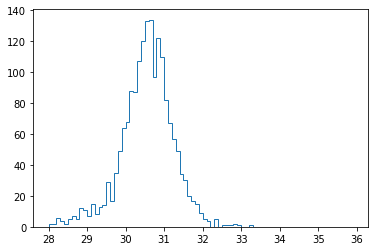

In [437]:
plt.hist(si1, bins=np.arange(28, 36, 0.1), histtype='step')
#plt.hist(i1, bins=np.arange(-10, -3, 0.1), histtype='step')
plt.show()


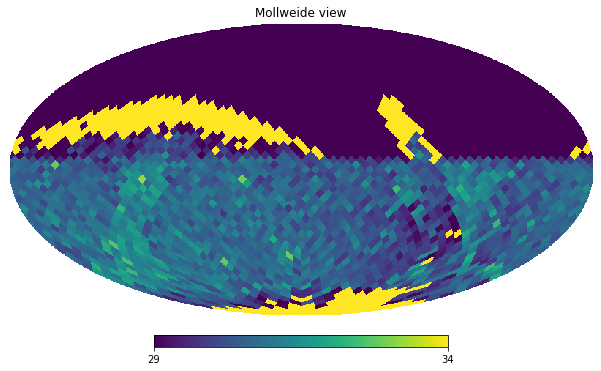

In [441]:
# dum = hp.mollview(g5, map=None)
# hp.mollview(i5)
#hp.mollview(np.ma.MaskedArray(i1), min=-9, max=-3)
hp.mollview(np.ma.MaskedArray(si1), min=29, max=34)

In [443]:
np.min(si1)

-999.9

Add in the foreground stellar density using Leo's Trilegal maps:

In [27]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']

filterName = filters[3]
# Load up the data, copy the keys into variables
data = np.load('../TriMaps/TRIstarDensity_%s_nside_128.npz' % filterName)
starDensity = data['starDensity'].copy()
# magnitude bins 
bins=data['bins'].copy()
# pixels where there were so many stars some were skipped
mask = data['overMaxMask']
data.close()

FileNotFoundError: [Errno 2] No such file or directory: '../TriMaps/TRIstarDensity_i_nside_128.npz'

In [ ]:
result_table = []
m1 = 17.
m2 = 20.
m_floor = np.where(bins <= m1)[0].max()
m_ceil = np.where(bins >= m2)[0].min()-1
starmap = starDensity[:,m_ceil+1] - starDensity[:,m_floor+1]
hp.mollview(np.log10(starmap), unit='log stars/sq deg, %.1f < r < %.1f' % (bins[m_floor], bins[m_ceil]), nest=True)
hp.mollview(starmap, unit='stars/sq deg, %.1f < r < %.1f' % (bins[m_floor], bins[m_ceil]), max=10000, nest=True)

### Below here is experimentation from LV_metric_scratch.ipynb (my first scratch notebook)

In [2]:
# Copy and modify the BDParallaxMetric
# As written, this returns the distance to which the parallax S/N condition is met.

# Make it so that it determines the distance to which the _color_ is measured to the S/N threshold.

# Things we would like to consider:
# 1. Make the cut on _color_ S/N rather than on individual filters
# 2. Require seeing better than some threshold for at least X% of i-band images
# 3. Set the limit based on reaching the BHB for more nearby galaxies, and at least ~1.5 mags below the TRGB for the most distant
# 4. Consider crowding criteria? This is crucial (along with good seeing) for stellar pops in the main bodies of nearby gxs.
# 5. Consider S/N based on star/gx separation (i.e., based on the number of stars given a target stellar density (signal),
#    compared to the number of stars+galaxies (noise))

class ColorDistMetric(BaseMetric):
    """Calculate the distance to which one could reach a photometric SNR for a given object

    Uses columns ra_pi_amp and dec_pi_amp, calculated by the ParallaxFactorStacker.

    Parameters
    ----------
    metricName : str, opt
        Default 'parallax'.
    m5Col : str, opt
        The default column name for m5 information in the input data. Default fiveSigmaDepth.
    filterCol : str, opt
        The column name for the filter information. Default filter.
    seeingCol : str, opt
        The column name for the seeing information. Since the astrometry errors are based on the physical
        size of the PSF, this should be the FWHM of the physical psf. Default seeingFwhmGeom.
    mags : dict
        The absolute magnitude of the obeject in question. Keys of filter name, values in mags.
        Start by assuming M_g = 0.6, g-i = -0.4 for a BHB star (update this later, for both BHB and RGB!)
    distances : np.array
        Distances to try putting the object at (kpc). [800 kpc to 6 Mpc]
    atm_err : float, opt
        The expected centroiding error due to the atmosphere, in arcseconds. Default 0.01.
    badval : float, opt
        The value to return when the metric value cannot be calculated. Default 0.
    """
    def __init__(self, metricName='rgbDist', m5Col='fiveSigmaDepth',
                 filterCol='filter', seeingCol='seeingFwhmGeom',
                 mags={'g':0.60, 'i':1.00}, color_snr=5.0,
                 fiducial_band='i', distances=np.arange(800, 6000, 100),
                 normalize=False, **kwargs):
        Cols = [m5Col, filterCol, seeingCol]
        
        units = 'kpc'
        super(ColorDistMetric, self).__init__(Cols, metricName=metricName, units=units,
                                              **kwargs)
        # set return type
        self.m5Col = m5Col
        self.seeingCol = seeingCol
        self.filterCol = filterCol
        self.distances = distances
        if mags.__contains__(fiducial_band):
            self.fiducial_band = fiducial_band
        else:
            # assign the first one in the dict as fiducial if the specified mag isn't there
            self.fiducial_band = list(mags.keys())[0] 
            print('Assigned ',self.fiducial_band,' as the fiducial band, since specified band was not in mags provided.')
        mag1=0
        mag2=0
        for key in mags:
            if key in fiducial_band:
                mag1 = mags[key]
            else:
                mag2 = mags[key]
        self.color = mag2-mag1
        self.mags = {}
        #self.mags = mags
        distance_mod = 5.0*np.log10(distances)-5.0
        for key in mags:
            self.mags[key] = mags[key] + distance_mod
        self.color_snr_goal = color_snr
        self.filters = list(self.mags.keys())
        
    def _mag2_at_color(self, snr1, mag5_1):
        """ Calculate the magnitude of the tracer corresponding to the fiducial m5 mag.
        """
        mag_desired_2 = self.color+mag5_1
        return mag_desired_2

    def run(self, dataslice, slicePoint=None):
        # Assume only two filters
        mag5_1 = np.zeros((np.size(self.mags[self.filters[0]])), dtype='float')
        mag5_2 = np.zeros((np.size(self.mags[self.filters[0]])), dtype='float')
        snr1 = np.zeros((np.size(self.mags[self.filters[0]])), dtype='float')
        snr2 = np.zeros((np.size(self.mags[self.filters[0]])), dtype='float')
        snr2_m5 = np.zeros((np.size(self.mags[self.filters[0]])), dtype='float')
        # snr = np.zeros((np.size(self.mags[self.filters[0]]), 2), dtype='float')
        # compute SNR for all observations
        for filt in self.filters:
            print('filter: ',filt)
            good = np.where(dataslice[self.filterCol] == filt)[0]
            print('size good: ', np.size(good), np.size(good[0]))
            if np.size(good) > 0:
                #snr[:, colnum] = mafUtils.m52snr(self.mags[str(filt)][:, np.newaxis],
                #                                 dataslice[self.m5Col][good])
            # Place the "fiducial" band first:
                if filt == self.fiducial_band:
                    snr1 = mafUtils.m52snr(self.mags[str(filt)],
                                           dataslice[self.m5Col][good])
                    mag5_1 = self.mags[str(filt)]
                else:
                    snr2_m5 = mafUtils.m52snr(self.mags[str(filt)],
                                              dataslice[self.m5Col][good])
                    m5Col2 = dataslice[self.m5Col][good]
                    mag5_2 = self.mags[str(filt)]

        mag5_target_2 = self._mag2_at_color(snr1, mag5_1)
        snr2 = mafUtils.m52snr(mag5_2, m5Col2)
        snr_color = np.sqrt(snr1**2 + snr2**2)
                 
        result = 0.0
        print(np.shape(snr_color))
        # Let's interpolate to the distance where we would get our target SNR
        if np.max(snr_color) >= self.color_snr_goal:
            f = interpolate.interp1d(snr_color, self.distances, fill_value="extrapolate")
            result = f(self.color_snr_goal)
        return result

In [3]:
# Copy and modify the BDParallaxMetric
# As written, this returns the distance to which the parallax S/N condition is met.

# Make it so that it determines the distance to which the _color_ is measured to the S/N threshold.

# Things we would like to consider:
# 1. Make the cut on _color_ S/N rather than on individual filters
# 2. Require seeing better than some threshold for at least X% of i-band images
# 3. Set the limit based on reaching the BHB for more nearby galaxies, and at least ~1.5 mags below the TRGB for the most distant
# 4. Consider crowding criteria? This is crucial (along with good seeing) for stellar pops in the main bodies of nearby gxs.
# 5. Consider S/N based on star/gx separation (i.e., based on the number of stars given a target stellar density (signal),
#    compared to the number of stars+galaxies (noise))

class starDistMetric(BaseMetric):
    """Calculate the distance to which one could reach a photometric SNR for a given object

    Uses columns ra_pi_amp and dec_pi_amp, calculated by the ParallaxFactorStacker.

    Parameters
    ----------
    metricName : str, opt
        Default 'parallax'.
    m5Col : str, opt
        The default column name for m5 information in the input data. Default fiveSigmaDepth.
    filterCol : str, opt
        The column name for the filter information. Default filter.
    seeingCol : str, opt
        The column name for the seeing information. Since the astrometry errors are based on the physical
        size of the PSF, this should be the FWHM of the physical psf. Default seeingFwhmGeom.
    mags : dict
        The absolute magnitude of the obeject in question. Keys of filter name, values in mags.
        Start by assuming M_g = 0.6, g-i = -0.4 for a BHB star (update this later, for both BHB and RGB!)
    distances : np.array
        Distances to try putting the object at (kpc). [800 kpc to 6 Mpc]
    atm_err : float, opt
        The expected centroiding error due to the atmosphere, in arcseconds. Default 0.01.
    badval : float, opt
        The value to return when the metric value cannot be calculated. Default 0.
    """
    def __init__(self, metricName='starDist', m5Col='fiveSigmaDepth',
                 filterCol='filter', seeingCol='seeingFwhmGeom',
                 absmags={'g':0.6, 'i':1.00}, percentile=90, normalize=False, **kwargs):
        Cols = [m5Col, filterCol]
        units = 'kpc'
        super(stellarDistMetric, self).__init__(Cols, metricName=metricName, units=units,
                                            **kwargs)
        # set return type
        self.m5Col = m5Col
        self.percentile = percentile
        self.filterCol = filterCol
        self.filters = list(absmags.keys())
        self.absmags = absmags

    def run(self, dataslice, slicePoint=None):
        dmods = np.zeros((np.size(self.absmags[self.filters[0]]), len(dataslice)), dtype='float')
        # compute distance modulus reached for all observations
        for filt in self.filters:
            good = np.where(dataslice[self.filterCol] == filt)[0]
            if np.size(good) > 0:
                dmods[:, good] = dataslice[self.m5Col][good]-self.absmags[filt]

        distances_kpc = (10.0**((dmods+5.0)/5))/1000.0
        return np.percentile(distances_kpc, self.percentile)


In [4]:
# Copy and modify the BDParallaxMetric
# As written, this returns the distance to which the parallax S/N condition is met.

# Make it so that it determines the distance to which the _color_ is measured to the S/N threshold.

# Things we would like to consider:
# 1. Make the cut on _color_ S/N rather than on individual filters
# 2. Require seeing better than some threshold for at least X% of i-band images
# 3. Set the limit based on reaching the BHB for more nearby galaxies, and at least ~1.5 mags below the TRGB for the most distant
# 4. Consider crowding criteria? This is crucial (along with good seeing) for stellar pops in the main bodies of nearby gxs.
# 5. Consider S/N based on star/gx separation (i.e., based on the number of stars given a target stellar density (signal),
#    compared to the number of stars+galaxies (noise))

class stellarDistMetric(BaseMetric):
    """Calculate the distance to which one could reach a photometric SNR for a given object

    Uses columns ra_pi_amp and dec_pi_amp, calculated by the ParallaxFactorStacker.

    Parameters
    ----------
    metricName : str, opt
        Default 'parallax'.
    m5Col : str, opt
        The default column name for m5 information in the input data. Default fiveSigmaDepth.
    filterCol : str, opt
        The column name for the filter information. Default filter.
    seeingCol : str, opt
        The column name for the seeing information. Since the astrometry errors are based on the physical
        size of the PSF, this should be the FWHM of the physical psf. Default seeingFwhmGeom.
    mags : dict
        The absolute magnitude of the obeject in question. Keys of filter name, values in mags.
        Start by assuming M_g = 0.6, g-i = -0.4 for a BHB star (update this later, for both BHB and RGB!)
    distances : np.array
        Distances to try putting the object at (kpc). [800 kpc to 6 Mpc]
    atm_err : float, opt
        The expected centroiding error due to the atmosphere, in arcseconds. Default 0.01.
    badval : float, opt
        The value to return when the metric value cannot be calculated. Default 0.
    """
    def __init__(self, metricName='stellarDist', m5Col='fiveSigmaDepth',
                 filterCol='filter', seeingCol='seeingFwhmGeom',
                 absmags={'g':0.6, 'i':1.00}, percentile=90, normalize=False, **kwargs):
        Cols = [m5Col, filterCol]
        units = 'kpc'
        super(stellarDistMetric, self).__init__(Cols, metricName=metricName, units=units,
                                            **kwargs)
        # set return type
        self.m5Col = m5Col
        self.percentile = percentile
        self.filterCol = filterCol
        self.filters = list(absmags.keys())
        self.absmags = absmags

    def run(self, dataslice, slicePoint=None):
        dmods = np.zeros((np.size(self.absmags[self.filters[0]]), len(dataslice)), dtype='float')
        # compute SNR for all observations
        for filt in self.filters:
            good = np.where(dataslice[self.filterCol] == filt)[0]
            if np.size(good) > 0:
                dmods[:, good] = dataslice[self.m5Col][good]-self.absmags[filt]
#                dmods[:, good] = dataslice[self.m5Col][good][:,np.newaxis]-self.absmags[filt]

        distances_kpc = (10.0**((dmods+5.0)/5))/1000.0
        # print('num distances: ',np.size(distances_kpc))
        return np.percentile(distances_kpc, self.percentile)

In [5]:
class VolumeSumMetric(BaseMetric):
    """Compute the total volume assuming a metric has values of distance
    """
    def __init__(self, col=None, metricName='VolumeSum', nside=None, **kwargs):
        super(VolumeSumMetric, self).__init__(col=col, metricName=metricName, **kwargs)
        self.pix_area = hp.nside2pixarea(nside)
        
    def run(self, dataSlice, slicePoint=None):
        # volume of sphere, times ratio of pixel area divided by area of sphere
        vols = 1./3. * dataSlice[self.colname]**3 * self.pix_area
        return np.sum(vols)

In [43]:
dbFile = '/sims_maf/fbs_1.7/baseline/baseline_nexp2_v1.7_10yrs.db'
runName = dbFile.replace('.db', '')
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [84]:
nside=16
bundleList = []
#sql = 'filter="z" or filter="y"'
#sqlconstraint = 'filter = "r" and night < 365'
sql_i = 'filter = "i"'
sql_g = 'filter = "g"'
#sql = 'night < 2000 and (filter="g" or filter="i")'
slicer = slicers.HealpixSlicer(nside=nside)
#slicer = slicers.UserPointsSlicer(11.8929, -25.2922)
#plotDict = {}
plotDict = {'percentileClip': 95.}

# Let's plug in the magnitudes for one type
#metric = ColorDistMetric(mags={'g': 0.0, 'i': -1.0}, fiducial_band='i', metricName='RGBColorDist')
##summaryStats = [VolumeSumMetric(nside=nside)]
#bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict,
#                                             runName=runName))
##                                             summaryMetrics=summaryStats,

# Now the mags for another type
metric_rgb = stellarDistMetric(absmags={'g':-0.67, 'i':-2.0}, metricName='RGBDist',percentile=95.0)
bundleList.append(metricBundles.MetricBundle(metric_rgb,slicer,sql_i, plotDict=plotDict,
                                             runName=runName))
bundleList.append(metricBundles.MetricBundle(metric_rgb,slicer,sql_g, plotDict=plotDict,
                                             runName=runName))
metric_bhb = stellarDistMetric(absmags={'g':0.57, 'i':0.00}, metricName='BHBDist',percentile=95.0)
bundleList.append(metricBundles.MetricBundle(metric_bhb,slicer,sql_i, plotDict=plotDict,
                                             runName=runName))
bundleList.append(metricBundles.MetricBundle(metric_bhb,slicer,sql_g, plotDict=plotDict,
                                             runName=runName))
#bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict,
#                                             summaryMetrics=summaryStats,
#                                             runName=runName))

metric_coadd = metrics.Coaddm5Metric()
bundleList.append(metricBundles.MetricBundle(metric_coadd, slicer, sql_i, plotDict=plotDict))
bundleList.append(metricBundles.MetricBundle(metric_coadd, slicer, sql_g, plotDict=plotDict))

metric_seeing = metrics.PercentileMetric(col='seeingFwhmGeom', percentile=33.3)
bundleList.append(metricBundles.MetricBundle(metric_seeing, slicer, sql_i, plotDict=plotDict))

metric_median_seeing = metrics.MedianMetric(col='seeingFwhmGeom')
bundleList.append(metricBundles.MetricBundle(metric_median_seeing, slicer, sql_i, plotDict=plotDict))

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


Querying database SummaryAllProps with constraint filter = "i" for columns ['filter', 'fiveSigmaDepth', 'fieldRA', 'fieldDec', 'seeingFwhmGeom']
Found 455743 visits
Running:  ['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_RGBDist_i_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_BHBDist_i_HEAL', 'opsim_CoaddM5_i_HEAL', 'opsim_33th_ile_seeingFwhmGeom_i_HEAL', 'opsim_Median_seeingFwhmGeom_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "g" for columns ['fieldDec', 'fiveSigmaDepth', 'fieldRA', 'filter']
Found 205011 visits
Running:  ['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_RGBDist_g_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_BHBDist_g_HEAL', 'opsim_CoaddM5_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "i"" constraint now.


/data0/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 1416.95  dipole: lon: 150.046, lat: -79.5525, amp: 152.722
  mono, lon, lat, amp
/data0/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 564.097  dipole: lon: 150.046, lat: -79.5525, amp: 60.7996
  mono, lon, lat, amp
/data0/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 25.906  dipole: lon: 117.771, lat: -72.1206, amp: 0.424111
  mono, lon, lat, amp
/data0/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 0.8428  dipole: lon: -54.9463, lat: 65.5583, amp: 0.117023
  mono, lon, lat, amp
/data0/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/pyth

Plotting complete.
Plotting figures with "filter = "g"" constraint now.


/data0/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 1182.34  dipole: lon: 103.726, lat: -79.3468, amp: 149.499
  mono, lon, lat, amp
/data0/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/data0/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 667.946  dipole: lon: 103.726, lat: -79.3468, amp: 84.4577
  mono, lon, lat, amp
/data0/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotli

Plotting complete.


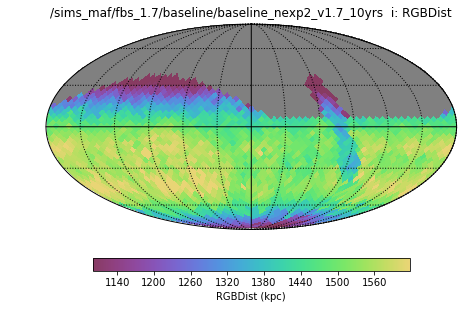

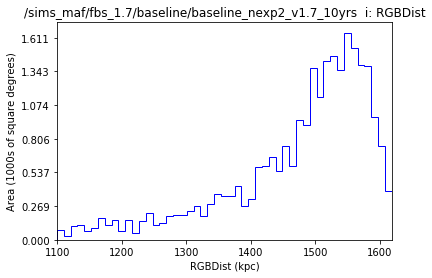

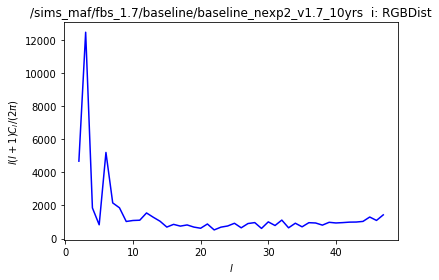

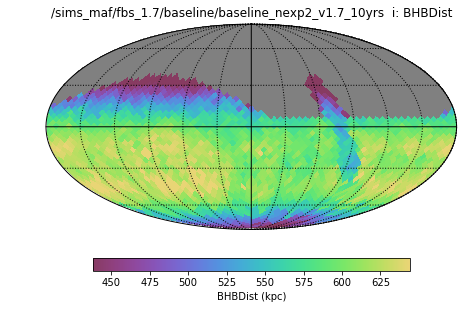

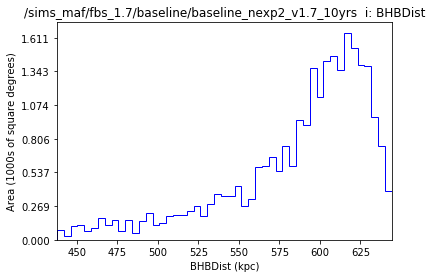

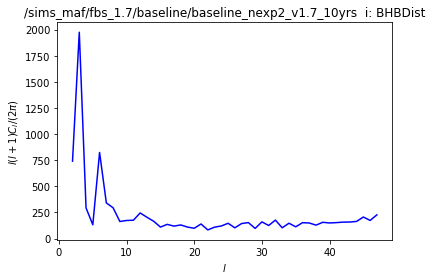

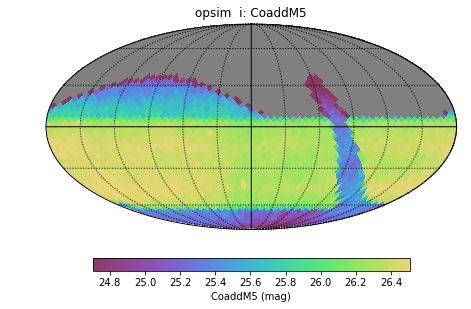

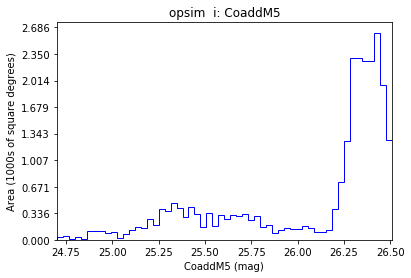

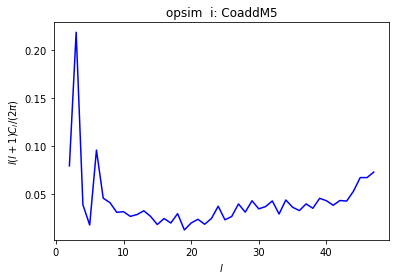

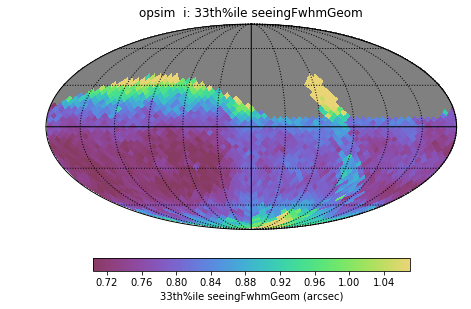

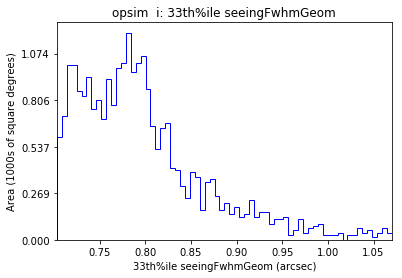

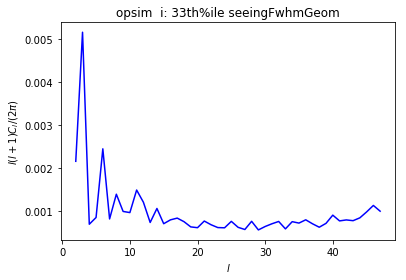

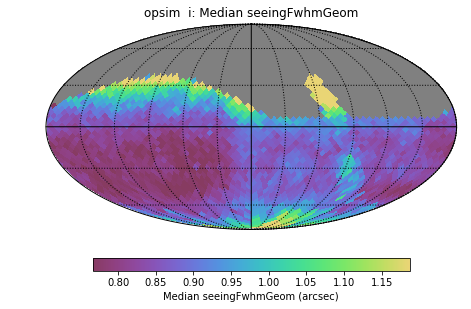

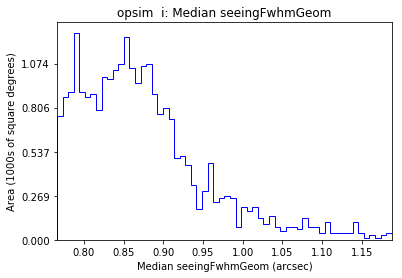

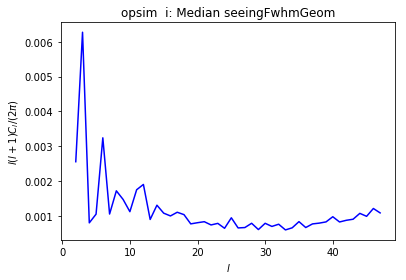

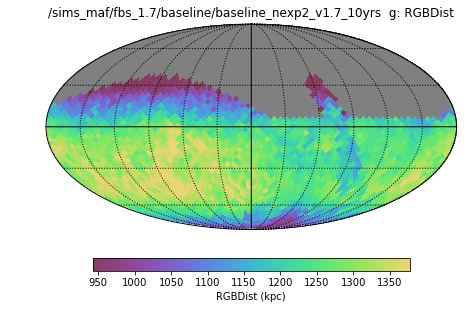

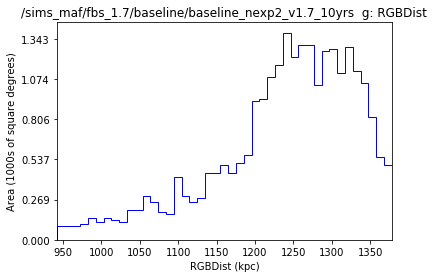

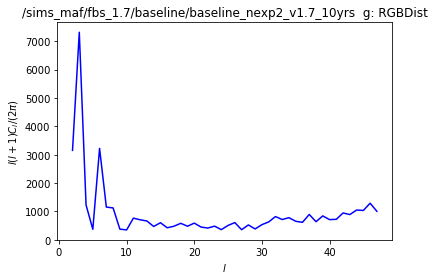

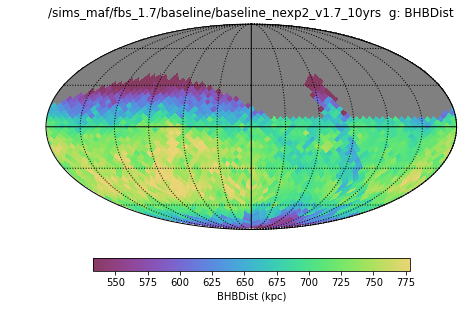

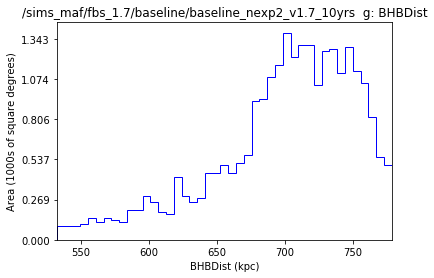

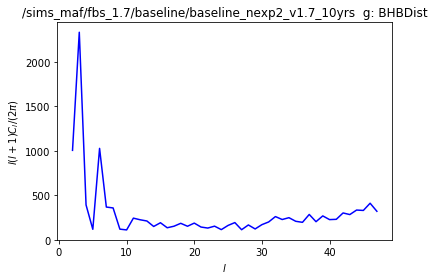

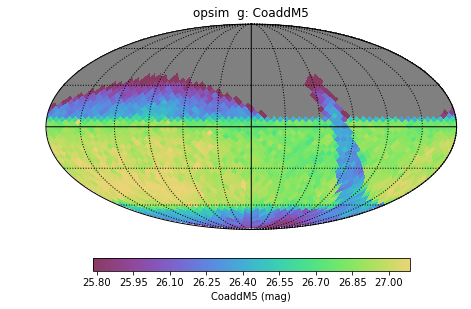

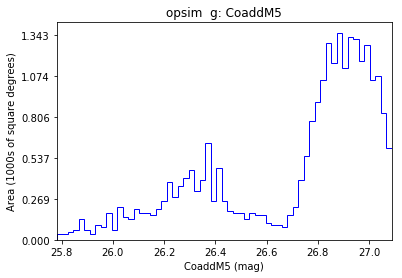

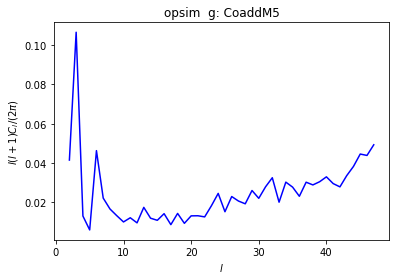

In [85]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [86]:
i5 = bg.bundleDict['opsim_CoaddM5_i_HEAL'].metricValues
g5 = bg.bundleDict['opsim_CoaddM5_i_HEAL'].metricValues
iband_seeing33 = bg.bundleDict['opsim_33th_ile_seeingFwhmGeom_i_HEAL'].metricValues
iband_seeing = bg.bundleDict['opsim_Median_seeingFwhmGeom_i_HEAL'].metricValues

In [48]:
np.shape(i5)

(3072,)

In [52]:
def stellarDistLimit(mags1, mags2, absmag1=0.6, absmag2=1.00):
    dist_lim = mags1*0.0-9.99
    lim_flag = mags1*0
    dmod1 = mags1 - absmag1
    dmod2 = mags2 - absmag2
    dist1 = (10.0**((dmod1+5.0)/5))/1000.0
    dist2 = (10.0**((dmod2+5.0)/5))/1000.0
    for i in range(len(mags1)):
        if dist1[i] < dist2[i]:
            dist_lim[i] = dist1[i]
            lim_flag[i] = 1
        else:
            dist_lim[i] = dist2[i]
            lim_flag[i] = 2

    return dist_lim, lim_flag

In [179]:
# Read in an isochrone to use in guiding our selection:

from astropy.io import ascii
iso = ascii.read('padova_iso_age10gyr_feh_m2p0_LSSTfilters.dat', header_start = 12)
postrgb = (iso['label'] > 3)
bhb = (iso['label'] == 4)

def absMagRGB_magsBelowTRGB(bands, mbelow):
    # Dict to allow inputs in the form of "i" or "z", but to look up the right columns for isochrone:
    band_dict = {'u':'umag', 'g':'gmag', 'r':'rmag', 'i':'imag', 'z':'zmag', 'y':'ymag'}
    absmags_mbelow = {}

    # Assumes we're interested in # mags below TRGB *in i band*:
    imag_trgb = np.min(iso['imag'][~postrgb])
    imag_mbelow = imag_trgb + mbelow
    idiff = iso['imag']-imag_mbelow
    pt_mbelow = np.where(np.abs(idiff) == np.nanmin(np.abs(idiff)))
    # print(np.nanmin(np.abs(idiff)), pt_mbelow)

    for band in bands:
        absmags_mbelow[band] = iso[band_dict[band]][pt_mbelow].data[0]
        
    return absmags_mbelow


def absMagBHB(bands):
    # Dict to allow inputs in the form of "i" or "z", but to look up the right columns for isochrone:
    band_dict = {'u':'umag', 'g':'gmag', 'r':'rmag', 'i':'imag', 'z':'zmag', 'y':'ymag'}
    absmags_bhb = {}
    for band in bands:
        mag_bhb = np.median(iso[band_dict[band]][bhb].data)
        absmags_bhb[band] = mag_bhb
        
    return absmags_bhb
    
        
#idiff = iso['imag']-imag_2magbelow
#pt2magbelow = np.where(idiff == np.min(np.abs(idiff)))
#gmag_2magbelow = iso['gmag'][pt2magbelow]

# BHB is label=4:


In [180]:
rgb_absmags = absMagRGB_magsBelowTRGB(('g', 'i'), 1.5)
bhb_absmags = absMagBHB(('g', 'i'))
print(rgb_absmags, bhb_absmags)

{'g': -1.159, 'i': -2.08} {'g': 0.504, 'i': 0.3535}


In [181]:
RGBLimitingDist, RGBLimitingFilter = stellarDistLimit(g5, i5, absmag1=rgb_absmags['g'], absmag2=rgb_absmags['i'])
BHBLimitingDist, BHBLimitingFilter = stellarDistLimit(g5, i5, absmag1=bhb_absmags['g'], absmag2=bhb_absmags['i'])

/data0/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


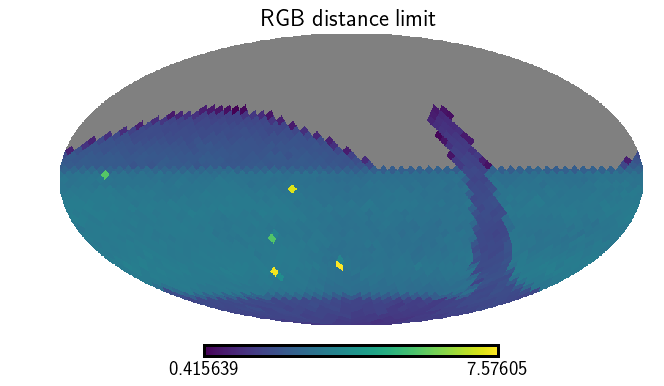

In [182]:
dum = hp.mollview(RGBLimitingDist/1000, title='RGB distance limit')

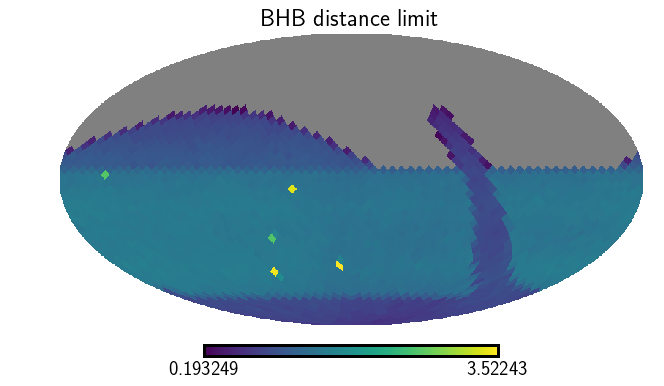

In [183]:
dum = hp.mollview(BHBLimitingDist/1000, title='BHB distance limit')

/data0/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/numpy/ma/core.py:1164: RuntimeWarning: overflow encountered in true_divide
  result = self.f(da, db, *args, **kwargs)


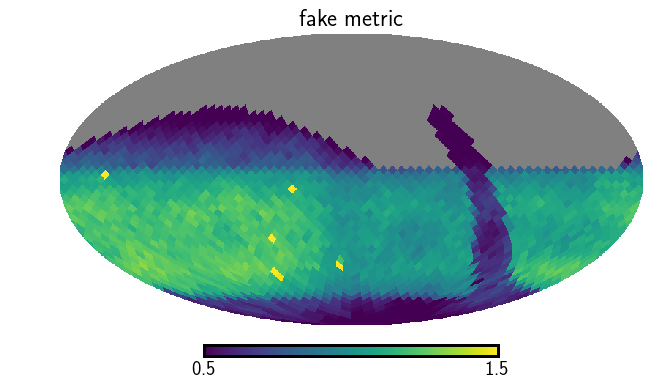

In [207]:
fake_metric0 = (RGBLimitingDist/3500)
fake_metric = fake_metric0/iband_seeing
#dum = hp.mollview((RGBLimitingDist/3000), title='fake metric', min=0.5, max=1.5)
dum = hp.mollview(fake_metric, title='fake metric', min=0.5, max=1.5)

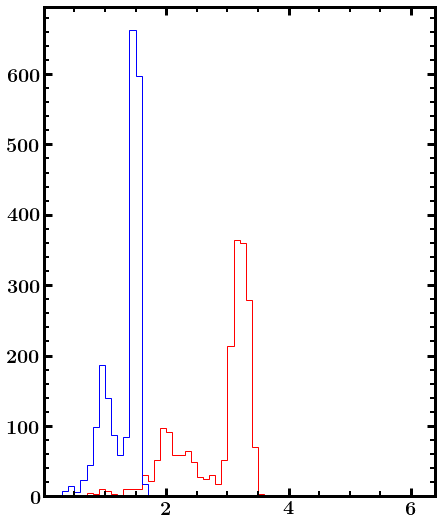

In [185]:
plt.hist(RGBLimitingDist/1000, bins=np.arange(0.3, 6.2, 0.1), histtype='step', color='Red')
plt.hist(BHBLimitingDist/1000, bins=np.arange(0.3, 6.2, 0.1), histtype='step', color='Blue')
plt.minorticks_on()
plt.show()

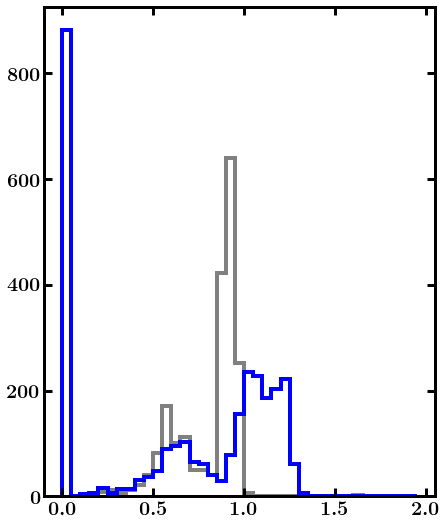

1.033442236068144 0.7876156612723553


In [209]:
plt.hist(fake_metric0, bins=np.arange(0, 2, 0.05), histtype='step', linewidth=4, color='Gray')
plt.hist(fake_metric, bins=np.arange(0, 2, 0.05), histtype='step', linewidth=4, color='Blue')
plt.show()

print(np.median(fake_metric[fake_metric > 0.05]), np.nanmedian(fake_metric[fake_metric > -0.1]))

In [197]:
np.nanmedian(RGBLimitingDist[(RGBLimitingDist.data > 0) & (RGBLimitingDist.data < 6000)].data/1000)

2.96712608064663

In [196]:
np.nanmedian(RGBLimitingDist/1000)

/data0/lsst_stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


nan

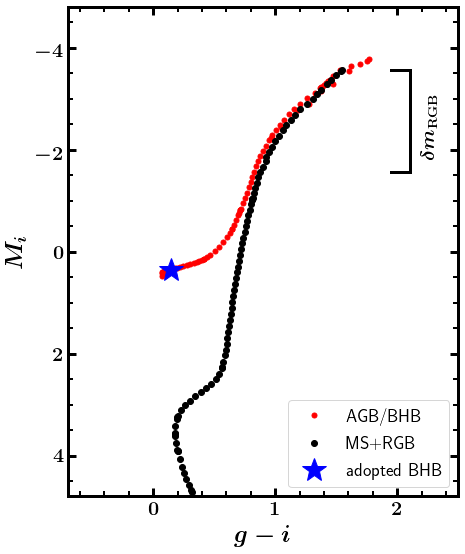

In [129]:
#%%
# Make a CMD for the LSST Cadence Note:
params = {
   'axes.labelsize': 24,
   'font.size': 20,
   'legend.fontsize': 18,
#   'xtick.labelsize': 16,
   'xtick.major.width': 3,
   'xtick.minor.width': 2,
   'xtick.major.size': 8,
   'xtick.minor.size': 5,
   'xtick.direction': 'in',
   'xtick.top': True,
   'lines.linewidth':3,
   'axes.linewidth':3,
   'axes.labelweight':3,
   'axes.titleweight':3,
   'ytick.major.width':3,
   'ytick.minor.width':2,
   'ytick.major.size': 8,
   'ytick.minor.size': 5,
   'ytick.direction': 'in',
   'ytick.right': True,
#   'ytick.labelsize': 20,
   'text.usetex': True,
   'text.latex.preamble': r'\boldmath',
   'figure.figsize': [7,9],
   'figure.facecolor': 'White'
   }

plt.rcParams.update(params)

postrgb = iso['label'] > 3
bhb = (iso['label'] == 4)

ggg = iso['gmag']
iii = iso['imag']

plt.plot(ggg[postrgb]-iii[postrgb], iii[postrgb], 'ro', ms=5, label='AGB/BHB')
plt.plot(ggg[~postrgb]-iii[~postrgb], iii[~postrgb], 'ko', ms=6, label='MS+RGB')
plt.ylim(4.8, -4.8)
plt.xlim(-0.7, 2.5)
plt.xlabel('$g-i$')
plt.ylabel('$M_i$')
plt.minorticks_on()

imag_trgb = np.min(iii[~postrgb])
imag_2magbelow = imag_trgb + 2.0
idiff = iii-imag_2magbelow
pt2magbelow = np.where(idiff == np.min(np.abs(idiff)))
gmag_2magbelow = ggg[pt2magbelow]

plt.plot([1.95, 2.1],[imag_trgb, imag_trgb],color='Black', label="__ none__")
plt.plot([2.1, 2.1],[imag_trgb, iii[pt2magbelow]], color='Black', label="__ none__")
plt.plot([1.95, 2.1],[iii[pt2magbelow], iii[pt2magbelow]], color='Black', label="__ none__")
plt.text(2.2, -2.8, r'$\delta m_{\mathrm{RGB}}$', rotation='vertical', label="__ none__")

#plt.plot([0.3,0.9], [-0.1, -0.1], linestyle='--', color='Black', label="__ none__")
plt.plot(np.median(ggg[bhb]-iii[bhb]), np.median(iii[bhb]), '*', color='Blue', ms=25, label="adopted BHB")
plt.legend(loc='lower right')

plt.show()

### Scratch space

In [13]:
print(10.0**((26.32+2.0+5)/5)/1e6)

4.61317574560379


In [14]:
conn.get_column_names()

{'Proposal': ['proposalId', 'proposalName', 'proposalType'],
 'SummaryAllProps': ['observationId',
  'fieldRA',
  'fieldDec',
  'observationStartMJD',
  'flush_by_mjd',
  'visitExposureTime',
  'filter',
  'rotSkyPos',
  'numExposures',
  'airmass',
  'seeingFwhm500',
  'seeingFwhmEff',
  'seeingFwhmGeom',
  'skyBrightness',
  'night',
  'slewTime',
  'visitTime',
  'slewDistance',
  'fiveSigmaDepth',
  'altitude',
  'azimuth',
  'paraAngle',
  'cloud',
  'moonAlt',
  'sunAlt',
  'note',
  'fieldId',
  'proposalId',
  'block_id',
  'observationStartLST',
  'rotTelPos',
  'moonAz',
  'sunAz',
  'sunRA',
  'sunDec',
  'moonRA',
  'moonDec',
  'moonDistance',
  'solarElong',
  'moonPhase',
  'cummTelAz'],
 'info': ['index', 'Parameter', 'Value']}

In [15]:
dir(metrics)

['AbsMaxMetric',
 'AbsMaxPercentMetric',
 'AbsMeanMetric',
 'AbsMedianMetric',
 'AccumulateCountMetric',
 'AccumulateM5Metric',
 'AccumulateMetric',
 'AccumulateUniformityMetric',
 'ActivityOverPeriodMetric',
 'ActivityOverTimeMetric',
 'AreaSummaryMetric',
 'AveSlewFracMetric',
 'BaseMetric',
 'BaseMoMetric',
 'BinaryMetric',
 'BruteOSFMetric',
 'ChipVendorMetric',
 'Coaddm5Metric',
 'Color_AsteroidMetric',
 'CompletenessMetric',
 'CountExplimMetric',
 'CountMetric',
 'CountRatioMetric',
 'CountSubsetMetric',
 'CountUniqueMetric',
 'CrowdingM5Metric',
 'CrowdingMagUncertMetric',
 'DcrPrecisionMetric',
 'DiscoveryMetric',
 'Discovery_DistanceMetric',
 'Discovery_EcLonLatMetric',
 'Discovery_N_ChancesMetric',
 'Discovery_N_ObsMetric',
 'Discovery_RADecMetric',
 'Discovery_TimeMetric',
 'Discovery_VelocityMetric',
 'ExgalM5',
 'ExgalM5_with_cuts',
 'FftMetric',
 'FilterColorsMetric',
 'FracAboveMetric',
 'FracBelowMetric',
 'FullRangeAngleMetric',
 'FullRangeMetric',
 'HighVelocityMetric

In [16]:
slicers.UserPointsSlicer?

Init signature:
slicers.UserPointsSlicer(
    ra,
    dec,
    lonCol='fieldRA',
    latCol='fieldDec',
    latLonDeg=True,
    verbose=True,
    badval=-666,
    leafsize=100,
    radius=1.75,
    useCamera=False,
    rotSkyPosColName='rotSkyPos',
    mjdColName='observationStartMJD',
    chipNames='all',
)
Docstring:     
A spatial slicer that evaluates pointings overlapping user-provided list of points.

Parameters
----------
ra : list or numpy.ndarray
    User-selected RA points, in degrees. Stored internally in radians.
dec : list or numpy.ndarray
    User-selected Dec points, in degrees. Stored internally in radians.
lonCol : str, optional
    Name of the longitude (RA equivalent) column to use from the input data.
    Default fieldRA
latCol : str, optional
    Name of the latitude (Dec equivalent) column to use from the input data.
    Default fieldDec
latLonDeg : bool, optional
    Flag indicating whether the lon and lat values will be in degrees (True) or radians (False).
    

In [17]:
bd.keys()

dict_keys(['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_RGBDist_i_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_RGBDist_g_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_BHBDist_i_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_BHBDist_g_HEAL', 'opsim_CoaddM5_i_HEAL', 'opsim_CoaddM5_g_HEAL'])

In [18]:
bd['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_BHBDist_i_HEAL'].metricValues

masked_array(data=[--, --, --, ..., 450.7452025392622, 420.6786071805866,
                   419.8957084938021],
             mask=[ True,  True,  True, ..., False, False, False],
       fill_value=-1.6375e+30)

In [32]:
bd2.keys()

dict_keys(['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_95th_ile_stellar_dist_kpc_i_HEAL'])

In [33]:
bd2['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_95th_ile_stellar_dist_kpc_i_HEAL'].metricValues

In [21]:
bg2.bundleDict.keys()

dict_keys(['_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_RGBdist_i_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_RGBdist_g_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_BHBdist_i_HEAL', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_BHBdist_g_HEAL'])

In [22]:
resultsDb.getMetricInfo()

array([( 1, 'RGBDist', 'RGBDist', 'HealpixSlicer', 'night < 2000', 'night < 2000', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_RGBDist_night_lt_2000_HEAL.npz'),
       ( 2, 'BHBDist', 'BHBDist', 'HealpixSlicer', 'night < 2000', 'night < 2000', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_BHBDist_night_lt_2000_HEAL.npz'),
       ( 3, 'RGBDist', 'RGBDist', 'HealpixSlicer', '', '', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_RGBDist_HEAL.npz'),
       ( 4, 'BHBDist', 'BHBDist', 'HealpixSlicer', '', '', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_BHBDist_HEAL.npz'),
       ( 5, 'CoaddM5', 'CoaddM5', 'HealpixSlicer', '', '', 'opsim_CoaddM5_HEAL.npz'),
       ( 6, 'RGBDist', 'RGBDist', 'UserPointsSlicer', '', '', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_RGBDist_USER.npz'),
       ( 7, 'BHBDist', 'BHBDist', 'UserPointsSlicer', '', '', '_sims_maf_fbs_1_7_baseline_baseline_nexp2_v1_7_10yrs_BHBDist_USER.npz'),
       ( 8, 'CoaddM5', 'CoaddM5', 

In [23]:
conn.columnNames

{'Proposal': ['proposalId', 'proposalName', 'proposalType'],
 'SummaryAllProps': ['observationId',
  'fieldRA',
  'fieldDec',
  'observationStartMJD',
  'flush_by_mjd',
  'visitExposureTime',
  'filter',
  'rotSkyPos',
  'numExposures',
  'airmass',
  'seeingFwhm500',
  'seeingFwhmEff',
  'seeingFwhmGeom',
  'skyBrightness',
  'night',
  'slewTime',
  'visitTime',
  'slewDistance',
  'fiveSigmaDepth',
  'altitude',
  'azimuth',
  'paraAngle',
  'cloud',
  'moonAlt',
  'sunAlt',
  'note',
  'fieldId',
  'proposalId',
  'block_id',
  'observationStartLST',
  'rotTelPos',
  'moonAz',
  'sunAz',
  'sunRA',
  'sunDec',
  'moonRA',
  'moonDec',
  'moonDistance',
  'solarElong',
  'moonPhase',
  'cummTelAz'],
 'info': ['index', 'Parameter', 'Value']}

In [9]:
# Copy and modify the BDParallaxMetric
# As written, this returns the distance to which the parallax S/N condition is met.

# Make it so that it determines the distance to which the _color_ is measured to the S/N threshold.

# Things we would like to consider:
# 1. Make the cut on _color_ S/N rather than on individual filters
# 2. Require seeing better than some threshold for at least X% of i-band images
# 3. Set the limit based on reaching the BHB for more nearby galaxies, and at least ~1.5 mags below the TRGB for the most distant
# 4. Consider crowding criteria? This is crucial (along with good seeing) for stellar pops in the main bodies of nearby gxs.
# 5. Consider S/N based on star/gx separation (i.e., based on the number of stars given a target stellar density (signal),
#    compared to the number of stars+galaxies (noise))

class stellarDistStacker(stackers.BaseStacker):
    """Calculate the distance to which one could reach a photometric SNR for a given object

    Uses columns ra_pi_amp and dec_pi_amp, calculated by the ParallaxFactorStacker.

    Parameters
    ----------
    metricName : str, opt
        Default 'parallax'.
    m5Col : str, opt
        The default column name for m5 information in the input data. Default fiveSigmaDepth.
    filterCol : str, opt
        The column name for the filter information. Default filter.
    seeingCol : str, opt
        The column name for the seeing information. Since the astrometry errors are based on the physical
        size of the PSF, this should be the FWHM of the physical psf. Default seeingFwhmGeom.
    mags : dict
        The absolute magnitude of the obeject in question. Keys of filter name, values in mags.
        Start by assuming M_g = 0.6, g-i = -0.4 for a BHB star (update this later, for both BHB and RGB!)
    distances : np.array
        Distances to try putting the object at (kpc). [800 kpc to 6 Mpc]
    atm_err : float, opt
        The expected centroiding error due to the atmosphere, in arcseconds. Default 0.01.
    badval : float, opt
        The value to return when the metric value cannot be calculated. Default 0.
    """

    colsAdded = ['stellar_dist_kpc']
#    colsAdded = ['stellar_dist_kpc', 'distmod']

    def __init__(self, m5Col='fiveSigmaDepth',
                 filterCol='filter', seeingCol='seeingFwhmGeom',
                 absmags={'g':0.6, 'i':1.00}, **kwargs):
        Cols = [m5Col, filterCol, seeingCol]

        self.colsReq = [m5Col, filterCol, seeingCol]

        # set return type
        self.units = ['kpc']
#        self.units = ['kpc', 'mag']
        self.m5Col = m5Col
        self.filterCol = filterCol
        self.filters = list(absmags.keys())
        self.seeingCol = seeingCol
        self.absmags = absmags

    def run(self, simData, cols_present=False):
        for filtername in np.unique(simData[self.filterCol]):
            in_filt = np.where(simData[self.filterCol] == filtername)[0]
            distmod = simData[self.m5Col][in_filt]-self.absmags[filtername]
            simData['stellar_dist_kpc'][in_filt] = (10.0**((distmod+5.0)/5))/1000.0

        return simData

In [30]:
nside=16
bundleList2 = []
#sql = 'filter="z" or filter="y"'
#sqlconstraint = 'filter = "r" and night < 365'
#sql_i = ''
#sql = 'filter="i" or filter="g"'
sql_i = 'filter = "i"'
sql_g = 'filter = "g"'
#sql = 'night < 2000 and (filter="g" or filter="i")'
stacker_rgb = stellarDistStacker()
#stacker_rgb = stellarDistStacker(absmags={'g':-0.67, 'i':-2.0})
#stacker_bhb = stellarDistStacker(absmags={'g':0.57, 'i':0.00})
slicer = slicers.HealpixSlicer(nside=nside)
metric_rgb = metrics.PercentileMetric(col='stellar_dist_kpc', percentile=95)
#metric_bhb = metrics.PercentileMetric(col='stellar_dist_kpc', percentile=95)
#metric_rgb = metrics.PercentileMetric(col='stellar_dist_kpc', percentile=95,  metricName='RGBdist')
metric_bhb = metrics.PercentileMetric(col='stellar_dist_kpc', percentile=95,  metricName='BHBdist')
summaryStats = []
#slicer = slicers.UserPointsSlicer(11.8929, -25.2922)
plotDict = {}
#plotDict = {'percentileClip': 95.}

# Now the mags for another type
bundleList2.append(metricBundles.MetricBundle(metric_rgb, slicer, sql_i, plotDict=plotDict, runName=runName,
                                              summaryMetrics=summaryStats, stackerList=[stacker_rgb]))
#bundleList2.append(metricBundles.MetricBundle(metric_rgb,slicer,sql_g, plotDict=plotDict, runName=runName,
#                                              summaryMetrics=summaryStats, stackerList=[stacker_rgb]))
#bundleList2.append(metricBundles.MetricBundle(metric_bhb,slicer,sql_i, plotDict=plotDict, runName=runName,
#                                              summaryMetrics=summaryStats, stackerList=[stacker_bhb]))
#bundleList2.append(metricBundles.MetricBundle(metric_bhb,slicer,sql_g, plotDict=plotDict, runName=runName,
#                                              summaryMetrics=summaryStats, stackerList=[stacker_bhb]))

#metric_coadd = metrics.Coaddm5Metric()
#bundleList2.append(metricBundles.MetricBundle(metric_coadd,slicer,sql_i, plotDict=plotDict))
#bundleList2.append(metricBundles.MetricBundle(metric_coadd,slicer,sql_g, plotDict=plotDict))

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


In [31]:
# actually run things
bd2 = metricBundles.makeBundlesDictFromList(bundleList2)
bg2 = metricBundles.MetricBundleGroup(bd2, conn, outDir=outDir, resultsDb=resultsDb)
bg2.runAll()
bg2.plotAll(closefigs=False)

Querying database SummaryAllProps with constraint filter = "i" for columns ['filter', 'fiveSigmaDepth', 'fieldRA', 'fieldDec', 'stellar_dist_kpc', 'seeingFwhmGeom']
Plotting figures with "filter = "i"" constraint now.
Plotting complete.


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>